## Cannibas Sales Data Exploration & Cleaning to answer below questions

## 1. What was the best month for Medical Marijuana Retail Sales? How much was earned that month?

## 2. What was the best month for Medical Marijuana Retail Sales? How much was earned that month?

The first part of any data analysis or predictive modeling task is an initial exploration of the data. Even if you collected the data yourself and you already have a list of questions in mind that you want to answer, it is important to explore the data before doing any serious analysis, since oddities in the data can cause bugs and muddle your results. Before exploring deeper questions, you have to answer many simpler ones about the form and quality of data. That said, it is important to go into your initial data exploration with a big picture question in mind since the goal of your analysis should inform how you prepare the data.

In [1]:
# Load in libraries
import calendar
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

# load dataset
cannibas_df =pd.read_csv(r"C:\Users\jki\Downloads\catalog data websites\Cannabis_Retail_Sales_by_Week_Ending.csv")
cannibas_df.head(5)

,Week Ending,Adult-Use Retail Sales,Medical Marijuana Retail Sales,Total Adult-Use and Medical Sales,Adult-Use Products Sold,Medical Products Sold,Total Products Sold,Adult-Use Average Product Price,Medical Average Product Price
0,1/14/2023,1485019.32,1776700.69,"3,261,720.01","33,610.00",49312,"82,922.00",44.25,36.23
1,1/21/2023,1487815.81,2702525.61,"4,190,341.42","33,005.00",77461,"110,466.00",45.08,34.89
2,1/28/2023,1553216.30,2726237.56,"4,279,453.86","34,854.00",76450,"111,304.00",44.56,35.65
3,1/31/2023,578840.62,863287.86,"1,442,128.48","12,990.00",24023,"37,013.00",44.56,35.93
4,2/4/2023,1047436.20,1971731.40,"3,019,167.60","24,134.00",56666,"80,800.00",43.49,34.84


After getting a sense of the data's structure, it is a good idea to look at a statistical summary of the variables with df.describe()

In [2]:
cannibas_df.describe()

,Adult-Use Retail Sales,Medical Marijuana Retail Sales,Medical Products Sold,Adult-Use Average Product Price,Medical Average Product Price
count,5.600000e+01,5.600000e+01,56.000000,56.000000,56.000000
mean,2.276876e+06,2.123356e+06,57249.678571,39.903571,37.270536
std,9.322851e+05,7.200575e+05,19860.656403,1.832596,1.552432
min,2.862930e+05,1.836612e+05,4973.000000,37.110000,34.840000
25%,1.536866e+06,1.884729e+06,49188.000000,38.707500,36.115000
50%,2.378927e+06,2.406065e+06,62846.000000,39.725000,36.780000
75%,3.019836e+06,2.567496e+06,68531.000000,40.440000,38.100000
max,3.805608e+06,3.085787e+06,86307.000000,45.080000,41.830000


In [3]:
# let see of  we have  missing data
missing_values = cannibas_df.isna().sum()
print(missing_values)

Week Ending                            0
Adult-Use Retail Sales                 0
Medical Marijuana Retail Sales         0
 Total Adult-Use and Medical Sales     0
 Adult-Use Products Sold               0
Medical Products Sold                  0
 Total Products Sold                   0
 Adult-Use Average Product Price       0
Medical Average Product Price          0
dtype: int64


In [4]:
# lets check the data types
cannibas_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56 entries, 0 to 55
Data columns (total 9 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Week Ending                          56 non-null     object 
 1   Adult-Use Retail Sales               56 non-null     float64
 2   Medical Marijuana Retail Sales       56 non-null     float64
 3    Total Adult-Use and Medical Sales   56 non-null     object 
 4    Adult-Use Products Sold             56 non-null     object 
 5   Medical Products Sold                56 non-null     int64  
 6    Total Products Sold                 56 non-null     object 
 7    Adult-Use Average Product Price     56 non-null     float64
 8   Medical Average Product Price        56 non-null     float64
dtypes: float64(4), int64(1), object(4)
memory usage: 4.1+ KB


In [5]:
# lets change the week ending date 
cannibas_df['Week Ending'] = pd.to_datetime(cannibas_df['Week Ending']) 
cannibas_df['Week Ending'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 56 entries, 0 to 55
Series name: Week Ending
Non-Null Count  Dtype         
--------------  -----         
56 non-null     datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 580.0 bytes


In [7]:
# Creating a new variable can be as simple as taking one variable and adding, multiplying or dividing by another. Let's create a new variable, Month, from 'Order Date':



cannibas_df['Month'] = cannibas_df['Week Ending'].dt.month
cannibas_df['Month'].describe()


count    56.000000
mean      6.071429
std       3.103412
min       1.000000
25%       3.750000
50%       6.000000
75%       9.000000
max      11.000000
Name: Month, dtype: float64

In [9]:
# lets confirm month column  has been added
cannibas_df.head(5)

,Week Ending,Adult-Use Retail Sales,Medical Marijuana Retail Sales,Total Adult-Use and Medical Sales,Adult-Use Products Sold,Medical Products Sold,Total Products Sold,Adult-Use Average Product Price,Medical Average Product Price,Month
0,2023-01-14,1485019.32,1776700.69,"3,261,720.01","33,610.00",49312,"82,922.00",44.25,36.23,1
1,2023-01-21,1487815.81,2702525.61,"4,190,341.42","33,005.00",77461,"110,466.00",45.08,34.89,1
2,2023-01-28,1553216.30,2726237.56,"4,279,453.86","34,854.00",76450,"111,304.00",44.56,35.65,1
3,2023-01-31,578840.62,863287.86,"1,442,128.48","12,990.00",24023,"37,013.00",44.56,35.93,1
4,2023-02-04,1047436.20,1971731.40,"3,019,167.60","24,134.00",56666,"80,800.00",43.49,34.84,2


In [10]:
cannibas_df['Year'] = cannibas_df['Week Ending'].dt.year
cannibas_df['Year'].describe()

count      56.0
mean     2023.0
std         0.0
min      2023.0
25%      2023.0
50%      2023.0
75%      2023.0
max      2023.0
Name: Year, dtype: float64

In [11]:
cannibas_df

,Week Ending,Adult-Use Retail Sales,Medical Marijuana Retail Sales,Total Adult-Use and Medical Sales,Adult-Use Products Sold,Medical Products Sold,Total Products Sold,Adult-Use Average Product Price,Medical Average Product Price,Month,Year
0,2023-01-14,1485019.32,1776700.69,"3,261,720.01","33,610.00",49312,"82,922.00",44.25,36.23,1,2023
1,2023-01-21,1487815.81,2702525.61,"4,190,341.42","33,005.00",77461,"110,466.00",45.08,34.89,1,2023
2,2023-01-28,1553216.30,2726237.56,"4,279,453.86","34,854.00",76450,"111,304.00",44.56,35.65,1,2023
3,2023-01-31,578840.62,863287.86,"1,442,128.48","12,990.00",24023,"37,013.00",44.56,35.93,1,2023
4,2023-02-04,1047436.20,1971731.40,"3,019,167.60","24,134.00",56666,"80,800.00",43.49,34.84,2,2023
5,2023-02-11,1671205.80,2815023.87,"4,486,229.67","38,764.00",77454,"116,218.00",43.33,36.30,2,2023
6,2023-02-18,1742486.74,3008219.03,"4,750,705.77","42,178.00",83065,"125,243.00",41.56,36.33,2,2023
7,2023-02-25,1862822.43,2793882.27,"4,656,704.70","45,919.00",75990,"121,909.00",40.76,36.74,2,2023
8,2023-02-28,700300.78,853033.11,"1,553,333.89","17,570.00",23469,"41,039.00",39.96,36.35,2,2023
9,2023-03-04,1355673.59,2145964.90,"3,501,638.49","33,548.00",56607,"90,155.00",40.42,37.98,3,2023


## 1. What was the best month for Adult-Use Retail Sales? How much was earned that month?

In [13]:
# Load in some packages
import calendar
import warnings
import pandas as pd
import matplotlib.pyplot as plt
from itertools import combinations
from collections import Counter

warnings.filterwarnings("ignore")

# 1. What was the best month for  Adult-Use Retail Sales ? How much was earned that month?

# Replace NaN or inf values in the 'Month' column with a default value (e.g., 0)
cannibas_df['Month'] = cannibas_df['Month'].fillna(0).astype(int)

# Convert month numbers to abbreviated month names
cannibas_df['Month Name'] = cannibas_df['Month'].apply(lambda x: calendar.month_abbr[x])

# Group by month and calculate total sales for each month
sales_by_month = cannibas_df.groupby('Month Name').sum()['Adult-Use Retail Sales']

# Find the best month for sales and the corresponding earnings
best_month = sales_by_month.idxmax()
earnings_for_best_month = sales_by_month.max()

print(f"The best month for Adult-Use Retail Sales was {best_month} with earnings of ${earnings_for_best_month:,.2f}")

The best month for Adult-Use Retail Sales was Nov with earnings of $15,372,542.50


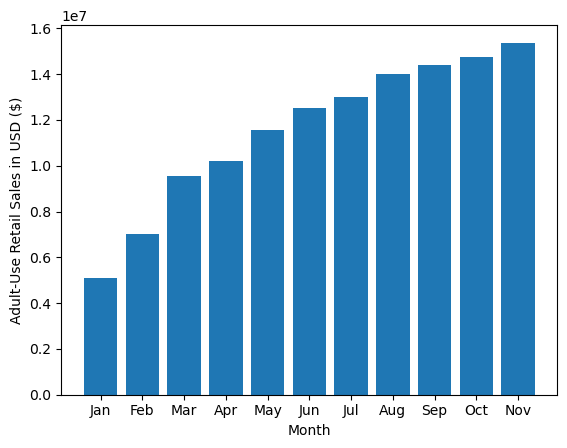

In [14]:
# Plot the highest number of Adult-Use Retail Sales for each month
unique_Months = cannibas_df['Month'].apply(lambda x: calendar.month_abbr[x]).unique() # Take all 12 months' names
Sales_by_month =cannibas_df.groupby('Month').sum()['Adult-Use Retail Sales'] # Take the highest number of Adult-Use Retail Sales for each month


plt.bar(unique_Months, Sales_by_month)
plt.xticks(unique_Months)
plt.ylabel('Adult-Use Retail Sales in USD ($)')
plt.xlabel('Month')
plt.show()

## 2. What was the best month for Medical Marijuana Retail Sales? How much was earned that month?

In [18]:
# Load in some packages
import calendar
import warnings
import pandas as pd
import matplotlib.pyplot as plt
from itertools import combinations
from collections import Counter

warnings.filterwarnings("ignore")

# 1. What was the best month for  Adult-Use Retail Sales ? How much was earned that month?

# Replace NaN or inf values in the 'Month' column with a default value (e.g., 0)
cannibas_df['Month'] = cannibas_df['Month'].fillna(0).astype(int)

# Convert month numbers to abbreviated month names
cannibas_df['Month Name'] = cannibas_df['Month'].apply(lambda x: calendar.month_abbr[x])

# Group by month and calculate total sales for each month
sales_by_month = cannibas_df.groupby('Month Name').sum()['Medical Marijuana Retail Sales']

# Find the best month for sales and the corresponding earnings
best_month = sales_by_month.idxmax()
earnings_for_best_month = sales_by_month.max()

print(f"The best month for Medical Marijuana Retail Sales was {best_month} with earnings of ${earnings_for_best_month:,.2f}")

The best month for Medical Marijuana Retail Sales was Mar with earnings of $12,576,006.42


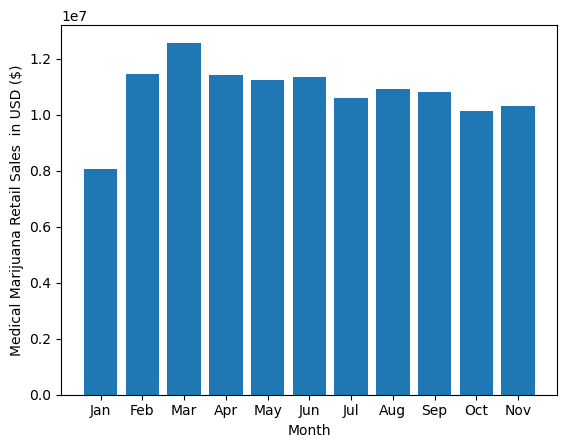

In [20]:
# Plot the highest number of Adult-Use Retail Sales for each month
unique_Months = cannibas_df['Month'].apply(lambda x: calendar.month_abbr[x]).unique() # Take all 12 months' names
Sales_by_month =cannibas_df.groupby('Month').sum()['Medical Marijuana Retail Sales'] # Take the highest number of Adult-Use Retail Sales for each month


plt.bar(unique_Months, Sales_by_month)
plt.xticks(unique_Months)
plt.ylabel('Medical Marijuana Retail Sales  in USD ($)')
plt.xlabel('Month')
plt.show()